## mSPRT Presentation

In [76]:
import sys
sys.path.append('/Users/thuan/eng/xp-algorithms/sequential-testing/')

import numpy as np
import scipy.stats as stats
import util.helper as helper
import util.ttest_core as ttest_core
import util.msprt_core as msprt_core
import util.sim_msprt as sim_msprt

import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
np.random.seed(2019)
np.random.beta(10,20)

0.2767132521173564

In [178]:
_ = ttest_core.estimate_sample_size(mu=0.5, relative_mde_value=0.05)
_ = ttest_core.estimate_sample_size(mu=0.2, relative_mde_value=0.02)
_ = msprt_core.estimate_sample_size(mu=0.2, relative_mde_value=0.02)

muA: 0.50000, muB: 0.52500, relative_mde_value: 0.05000, variant_sample_size: 10,382
muA: 0.20000, muB: 0.20400, relative_mde_value: 0.02000, variant_sample_size: 261,830
muA: 0.20000, muB: 0.20400, relative_mde_value: 0.02000, variant_sample_size: 176,795


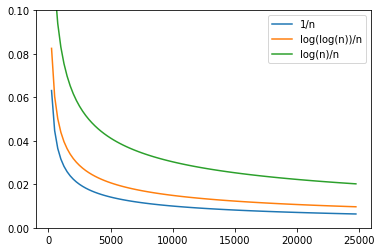

In [154]:
dc = [[] for i in range(10)]
effect = []
s = []
for i in range(250,25000,250):
    n = i+1
    s.append(n)
    dc[0].append(np.sqrt(1/n))
    dc[1].append(np.sqrt(np.log(np.log(n))/n))
    dc[2].append(np.sqrt(np.log(n)/n))

plt.plot(s, dc[0], label='1/n')
plt.plot(s, dc[1], label='log(log(n))/n')
plt.plot(s, dc[2], label='log(n)/n')
plt.ylim([0,0.1])
plt.legend()

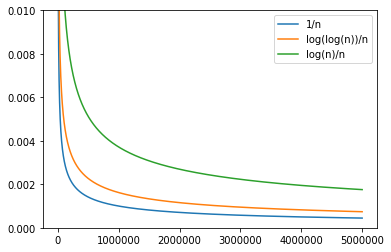

In [152]:
dc = [[] for i in range(10)]
effect = []
s = []
for i in range(250,5000000,250):
    n = i+1
    s.append(n)
    dc[0].append(np.sqrt(1/n))
    dc[1].append(np.sqrt(np.log(np.log(n))/n))
    dc[2].append(np.sqrt(np.log(n)/n))

plt.plot(s, dc[0], label='1/n')
plt.plot(s, dc[1], label='log(log(n))/n')
plt.plot(s, dc[2], label='log(n)/n')
plt.ylim([0,0.01])
plt.legend()

In [ ]:
np.random.seed(2051) #<--- for 0.5
#2021
#2029
#2030
#2038<===
#2042
#2043
#2049
#2050
#2051

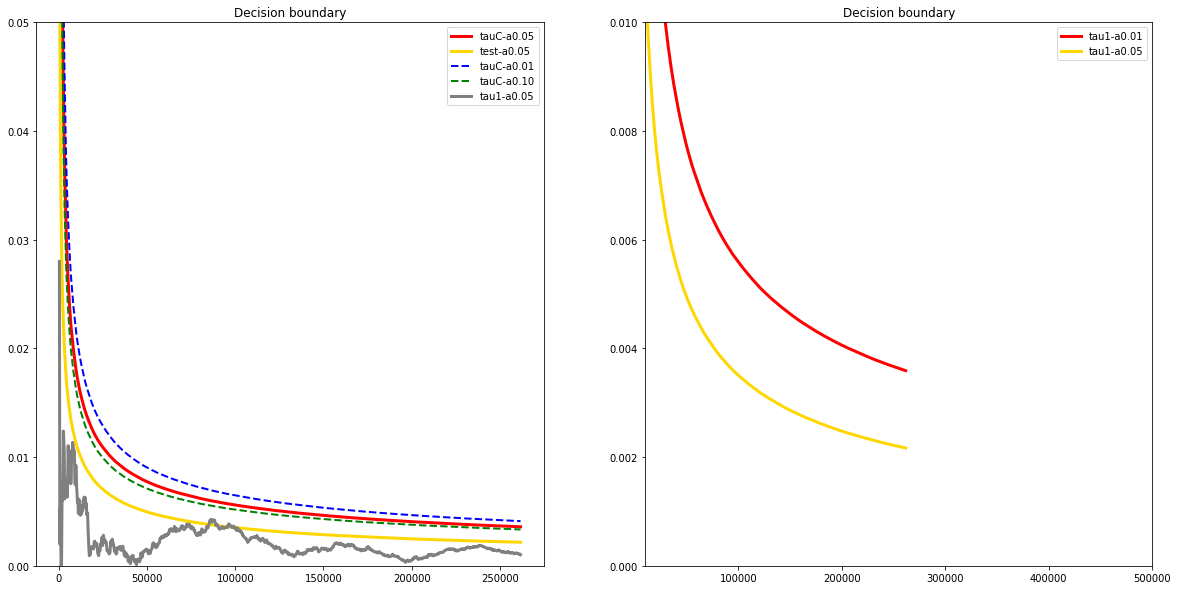

In [180]:
np.random.seed(202)
#2025
#2028

n = 261830

a1 = np.random.binomial(1, 0.2, n)
a2 = np.random.binomial(1, 0.2, n)
b1 = np.cumsum(a1)
b2 = np.cumsum(a2)

dc = [[] for i in range(10)]
effect = []
s = []
for i in range(250,n,250):
    s.append(i+1)
    sa = b1[i]
    sb = b2[i]
    
    ret1 = msprt_core.calc_stat(sa, i+1, sb, i+1, alpha=0.05, tau_option=3)
    ret3 = msprt_core.calc_stat(sa, i+1, sb, i+1, alpha=0.01, tau_option=3)
    ret4 = msprt_core.calc_stat(sa, i+1, sb, i+1, alpha=0.10, tau_option=3)
    ret2 = ttest_core.calc_stat(a1[:i], a2[:i], alpha=0.05)
    effect.append(abs(ret2['effect']))
   
    dc[0].append(ret1['decision_boundary'])
    dc[1].append(ret2['decision_boundary'])
    dc[2].append(ret3['decision_boundary'])
    dc[3].append(ret4['decision_boundary'])

plt.figure(figsize=(20, 10))
plt.subplot(121)

f1 = np.array(dc[1])*np.sqrt(np.log(np.log(s)))
f2 = np.array(dc[1])*np.sqrt(np.log(s))
plt.plot(s, dc[0], color='red', linewidth=3,    label='tauC-a0.05')
plt.plot(s, dc[1], color='gold',   linewidth=3, label='test-a0.05')
plt.plot(s, dc[2], '--', color='blue',   linewidth=2, label='tauC-a0.01')
plt.plot(s, dc[3], '--', color='green',   linewidth=2, label='tauC-a0.10')
#plt.plot(s, f1, '--', color='cyan',   linewidth=2, label='tau1-a0.05')
#plt.plot(s, f2, '--', color='blue',   linewidth=2, label='tau1-a0.05')
plt.plot(s, effect, color='grey',   linewidth=3, label='tau1-a0.05')
#plt.ylim([0.01, 0.175])
plt.ylim([0.00, 0.05])
#plt.xlim([0, 10000])
plt.legend()
plt.title('Decision boundary')

plt.subplot(122)
plt.plot(s, dc[0], color='red', linewidth=3,    label='tau1-a0.01')
plt.plot(s, dc[1], color='gold',   linewidth=3, label='tau1-a0.05')
plt.ylim([0, 0.01])
plt.xlim([10000, 500000])
plt.legend()
plt.title('Decision boundary')
plt.show()

In [128]:
len(dc[1]), len(s)

(1047, 1047)

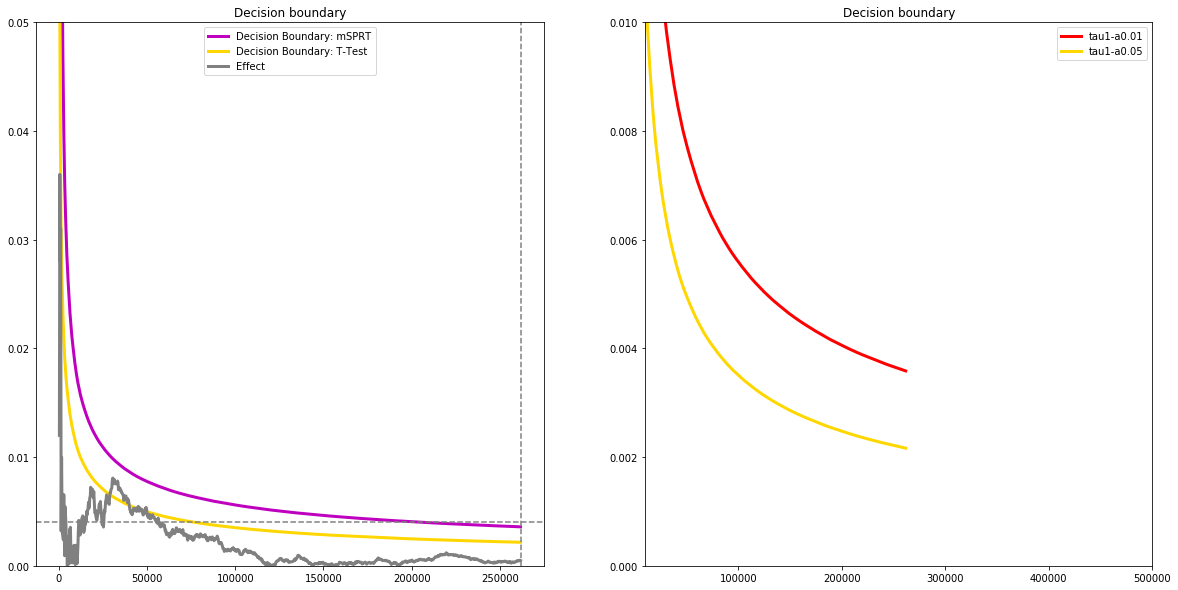

In [175]:
plt.figure(figsize=(20, 10))
plt.subplot(121)

f1 = np.array(dc[1])*np.sqrt(np.log(np.log(s)))
f2 = np.array(dc[1])*np.sqrt(np.log(s))
plt.plot(s, dc[0], color='m', linewidth=3,    label='Decision Boundary: mSPRT')
plt.plot(s, dc[1], color='gold',   linewidth=3, label='Decision Boundary: T-Test')
#plt.plot(s, f1, '--', color='cyan',   linewidth=2, label='tau1-a0.05')
#plt.plot(s, f2, '--', color='blue',   linewidth=2, label='tau1-a0.05')
plt.plot(s, effect, color='grey',   linewidth=3, label='Effect')

#plt.ylim([0.01, 0.175])
plt.ylim([0.00, 0.05])
#plt.xlim([0, 10000])
plt.axvline(s[-1], color='grey', linestyle='--')
plt.axhline(0.004, color='grey', linestyle='--')
plt.legend()
plt.title('Decision boundary')

plt.subplot(122)
plt.plot(s, dc[0], color='red', linewidth=3,    label='tau1-a0.01')
plt.plot(s, dc[1], color='gold',   linewidth=3, label='tau1-a0.05')
plt.ylim([0, 0.01])
plt.xlim([10000, 500000])

plt.legend()
plt.title('Decision boundary')
plt.show()

Test statistic:

$$ts = \frac{\overline{Y}_{n} - \overline{X}_{n}}{\sqrt{\frac{s_{x}^{2}}{N_{x}}+\frac{s_{y}^{2}}{N_{y}}}} \sim T_{v} \ \ distribution$$

Critical value method:

$$|ts| \gt t_{1 - \alpha/2,\ v}$$

P-value method:

$$ p-value = 2 * P(T_{v} > |ts|) > \alpha$$

Confidence interval method:

$$\overline{Y}_{n} - \overline{X}_{n} \pm \ t_{1 - \alpha/2,\ v}{\sqrt{\frac{s_{x}^{2}}{N_{x}}+\frac{s_{y}^{2}}{N_{y}}}}$$

**Control Variant A**: $X_{1}, X_{2}, ...., X_{n} \sim f(x|\mu_{x}, \sigma_{x})$  
**Test Variant B**: $Y_{1}, Y_{2}, ...., Y_{n} \sim f(x|\mu_{y}, \sigma_{y})$

$H_{0}: \theta = \mu_{y} - \mu_{x} = 0$  
$H_{a}: \theta = \mu_{y} - \mu_{x} \neq 0$

$\theta$ = **effect**

$$ p-value = 2 * P(T > |t|) > \alpha$$

$$\overline{Y}_{n} - \overline{X}_{n} \pm {\sqrt{\frac{s_{x}^{2}}{N_{x}}+\frac{s_{y}^{2}}{N_{y}}}}$$

Mixture Sequential Probability Ratio Test(mSPRT) is one of the sequential testing algorithms offered in One XP. The sequential testing algorithms enable users to monitor test results continuously and safely conclude a test whenever a significant effect is present. A brief introduction of mSPRT is given below.

In an A/B test setting,<br>
<center>Control variant A: $X_{1}$, $X_{2}$, ... , $X_{n}$ ~  $f(x|\mu_{x},\sigma_{x})$</center>
<center>&nbsp;&nbsp;&nbsp;Test variant B: $Y_{1}$, $Y_{2}$, ... , $Y_{n}$  ~  $f(y|\mu_{y},\sigma_{y})$</center>

$$H_{0}: \theta = \mu_{y} - \mu_{x} = \theta_{0}$$
$$H_{a}: \theta = \mu_{y} - \mu_{x} \neq \theta_{0}$$


Assume $\theta$ takes values in $\Theta \subset R$. The test statistic used in mixture SPRT is a likelihood ratio integrated over a mixing distribution $H$, where $H$ is assumed to have a density $h(\theta)$ that is positive everywhere  over $\Theta$:

$$\Lambda^{H, \theta_{0}}_{n} = \int_{\Theta} \prod^{n}_{m=1} \frac{f_{\theta}(X_{m})}{f_{\theta_{0}}(X_{m})} h(\theta) d\theta \ \ \ \ \ \ (eq. 1)$$

Given a desired false positive probability $\alpha$, it stops and rejects the null hypothesis at the first time $T = T^{H}(\alpha)$ that  
<br>
$$\Lambda^{H, \theta_{0}}_{n} > \alpha^{-1}$$
<br>
if no such time exists, it never rejects the null hypothesis. **Using standard martingale techniques, it can be shown that this sequential test controls Type I error at level $\alpha$**.

For data generated from general exponential families, as long as an appropriate conjugate distribution is chosen as $H$, computation of $\Lambda^{H, \theta_{0}}_{n}$ is inexpensive. For example, for data generated from a normal distribution $N(\mu, \sigma^{2})$, it turns out that if we use a normal mixing distribution centered at the null hypothesis(i.e., $H = N(\theta_{0}, \tau)$), then we can obtain a **closed form formula** for $\Lambda^{H,\theta_{0}}_{n}$:

$$\Lambda^{H,\theta_{0}}_{n} = \sqrt{\frac{V_{n}}{V_{n}+\tau}} \times exp \{ \frac{\tau }{2V_{n}(V_{n}+\tau)}(\overline{Y}_{n} - \overline{X}_{n} - \theta_{0})^{2}\}$$ 

, where $V_{n}$ is sample variance of $\overline{Y}_{n} - \overline{X}_{n}$.
    
      
The $\tau$ parameter in $H$ is the only hyperparameter needed to be tuned. Currently $\tau$ = 0.0001 is used in the program.

[1]  
     
     
Similar to p-value and confidence interval employed in classical hypothesis testing, the sequential version of p-value and confidence interval can be defined for mSPRT as follows:

## Always valid p-value process

Definition:
>A sequence of p-values ($p_{n}$) is an always valid p-value process if given any stopping time $T$, there holds:  
>  
>$$\forall \alpha \in [0, 1], P_{\theta_{0}}(p_{T} \le \alpha) \le \alpha $$


For a given mSPRT $\Lambda^{H, \theta_{0}}_{n}$ sequence, it can be shown that $p_{n}$ satisfying the following simple recursion is an always valid p-value process:  
  
$$p_{0} = 1; p_{n} = min \{ p_{n-1}, 1/{\Lambda^{H, \theta_{0}}_{n}}\}$$ [1]

## Always valid confidence interval process

Definition:

>A sequence of (1- $\alpha$)-level confidence intervals ($I_{n}$) is an always valid confidence interval process if for any stopping time $T$, the corresponding interval $I_{T}$ has $1 - \alpha$ coverage of the true parameter: 
>  
>$$\forall \theta \in \Theta, P_{\theta}(\theta \in I_{T}) \ge 1- \alpha $$


For a given mSPRT $\Lambda^{H, \theta_{0}}_{n}$ sequence, it also can be shown that $I_{n}$ satisfying the following simple recursion is an always valid confidence interval process:  

$$I_{0} = \Theta; I_{n} = I_{n-1} \cap \{\theta: \Lambda^{H, \theta}_{n} \ge \alpha^{-1}\}$$ 


Using the $eq. 1$, we can derive the range of $\theta$ that satisifies $\{\theta: \Lambda^{H, \theta}_{n} \ge \alpha^{-1}\}$, i.e.


$$\overline{Y}_{n} - \overline{X}_{n} \pm \sqrt{\frac{V_{n}(V_{n}+\tau)}{\tau}(-2\log(\alpha)-\log(\frac{V_{n}}{V_{n}+\tau})}$$

[1]

## Sample size estimation

Let $N_{\delta}$ denote the sample size of power 1 for given effect size $\delta$. The following formula provides a reasonable approximation for the average sample size of power 1.  
<br>
$E[N_{\delta}] = \frac{v_{x}+v_{y}}{\delta^{2}}\{log(-2 \tau e^{\delta^{2}/\tau} \log(\alpha)) - log(\delta^{2} \alpha^{2}) - 1\}$, where $\delta$ is the effect size.
<br>
<br>
Let $N_{\delta_{1-\beta}}$ denote the sample size threshold for achieving the power $1 - \beta$ for given $\delta$. The following formula provides a reasonable approximation.
  
$N_{\delta_{1-\beta}} = (0.35 - 0.79\log(\beta)) E[N_{\delta}]$.

Given this formula, the power can be estimated by solving the formula for given $\beta$ and sample size $N$.

[2]

In [1]:
import sys
import numpy as np
import pandas as pd
import util.ttest_core as ttest_core
import util.msprt_core as msprt_core
import util.sim_msprt as sim_msprt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
df = pd.read_csv('./backtesting/data/t288_daily.csv')
df['date2'] = pd.to_datetime(df.date)
print(df.cntr_gen.sum(), df.test_gen.sum(), df.cntr_act.sum(), df.test_act.sum(), df.shape)
df.head(2)

218360.0 346535 35572.0 58462 (94, 13)


,date,cntr_gen,test_gen,cntr_gen_cumu,test_gen_cumu,cntr_act,test_act,cntr_act_cumu,test_act_cumu,cntr_cvr_cumu,test_cvr_cumu,lift_cumu,date2
0,2017-08-29,1028.0,1098,1028.0,1098,213.0,214,213.0,214,0.207198,0.194900,-0.059357,2017-08-29
1,2017-08-30,3329.0,3289,4357.0,4387,584.0,581,797.0,795,0.182924,0.181217,-0.009331,2017-08-30


33
Ran for 94 days, lift=3.56%
Control: gen=218,360, action=35,572.0, cvr_rate:16.29%
varC   : gen=346,535, action=58,462, cvr_rate:16.87%
Test conculsive on 33th day(50,207 samples, lift=4.03%)
3686
muA: 0.16290, muB: 0.16946, relative_mde_value: 0.04030, variant_sample_size: 83,553

Based on lift=4.03%:
T-test sample size: 83,553 needed
mSPRT sample size: 51,789 needed
p-value:0.00000


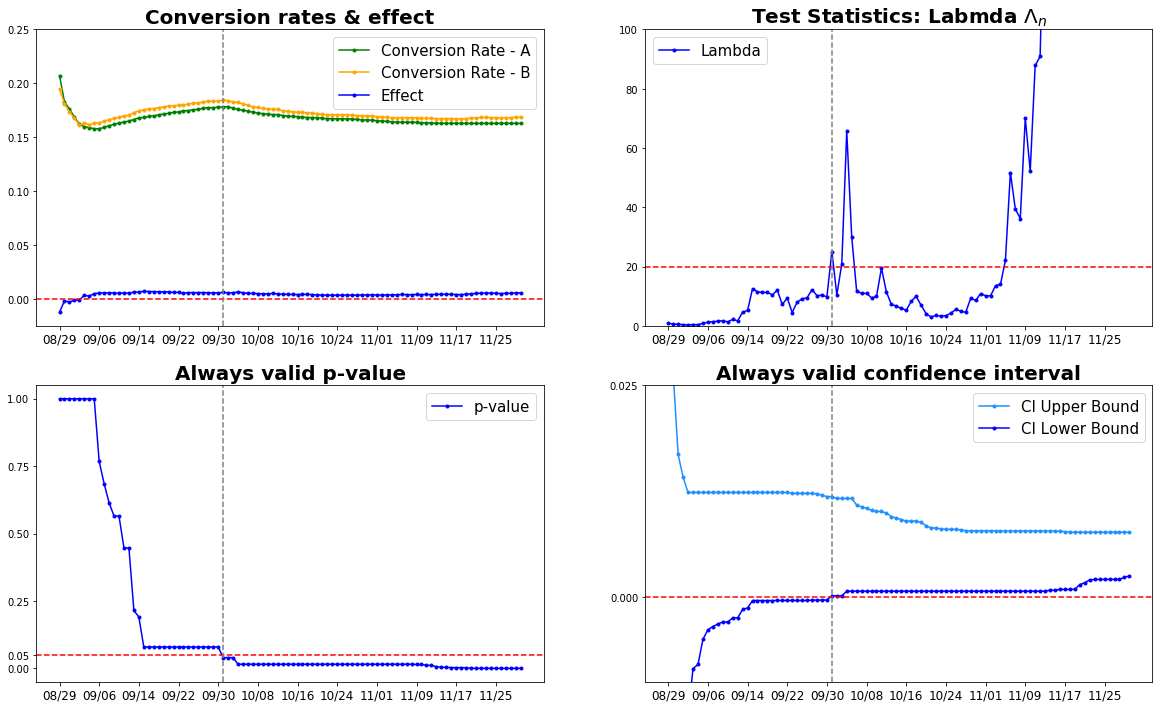

In [16]:
cvr_a, cvr_b, effect, tau, V, Lambda, decision_boundary, p_val, sig_val, ci_lb, ci_ub, res = ([] for i in range(12))
prev_p_val = 1
prev_effect_ci = [-1000,1000]

for i in range(len(df)):
    
    sa = df.cntr_act_cumu[i]
    na = df.cntr_gen_cumu[i]
    sb = df.test_act_cumu[i]
    nb = df.test_gen_cumu[i]
    
    # apply mSPRT
    ret = msprt_core.calc_stat(sa, na, sb, nb, 
                               alpha=0.05, 
                               tau_constant=0.0001,
                               prev_p_value=prev_p_val,
                               prev_effect_ci=prev_effect_ci)
    
    cvr_a.append(ret['cvr_a'])
    cvr_b.append(ret['cvr_b'])
    effect.append(ret['effect'])
    tau.append(ret['tau'])
    V.append(ret['V'])
    Lambda.append(ret['Lambda'])
    decision_boundary.append(ret['decision_boundary'])
    p_val.append(ret['p_value'])
    effect_ci = ret['effect_ci']
    res.append(ret['msprt_res'])
    
    sig_val.append(1-p_val[-1])
    ci_lb.append(effect_ci[0])
    ci_ub.append(effect_ci[1])
    
    prev_p_val = p_val[-1]
    prev_effect_ci = effect_ci
    
sig_loc = df.date2[np.where(np.array(sig_val)>0.95)[0][0]]
print(np.where(np.array(sig_val)>0.95)[0][0])
x_dates = [df.date2[i] for i in range(0, len(df.date2), 8)]

lr = df.iloc[-1]
print('Ran for {} days, lift={:.2f}%'.format(len(df), lr['lift_cumu']*100))
print('Control: gen={:,}, action={:,}, cvr_rate:{:.2f}%'
      .format(int(lr['cntr_gen_cumu']),lr['cntr_act_cumu'],lr['cntr_cvr_cumu']*100))
print('varC   : gen={:,}, action={:,}, cvr_rate:{:.2f}%'
      .format(int(lr['test_gen_cumu']),lr['test_act_cumu'],lr['test_cvr_cumu']*100))
print('Test conculsive on {}th day({:,} samples, lift={:.2f}%)'
      .format(np.where(np.array(p_val)<0.05)[0][0], df.iloc[19]['test_gen_cumu'], df.iloc[19]['lift_cumu']*100))
print(int(lr['test_gen_cumu']/len(df)))
ts=ttest_core.estimate_sample_size(0.1629, 0.0403)['variant_sample_size']
ms=msprt_core.estimate_sample_size(0.1629, 0.0403, pr=False)['variant_sample_size']
td = (ts/lr['cntr_gen_cumu']-1)*len(df)
md = (ms/lr['cntr_gen_cumu']-1)*len(df)
print('\nBased on lift=4.03%:')
print('T-test sample size: {:,} needed'.format(ts))
print('mSPRT sample size: {:,} needed'.format(ms))
print('p-value:{:.5f}'.format(p_val[-1]))


# Set 1: plot conversion rates, effect, tau, V
plt.figure(figsize=(20, 12))
ax1 = plt.subplot(221)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, cvr_a, 'o-', markersize=3, color='green', label='Conversion Rate - A')
plt.plot(df.date2, cvr_b, 'o-', markersize=3, color='orange', label='Conversion Rate - B')
plt.plot(df.date2, effect, 'o-', markersize=3, color='blue', label='Effect')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates, fontsize=12)
plt.ylim([-0.025,0.25])
plt.legend(prop={'size': 15})
plt.title('Conversion rates & effect', fontweight='bold', fontsize=20)

ax2 = plt.subplot(222)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax2.plot(df.date2, Lambda, 'o-', markersize=3, color='blue', label='Lambda')
plt.axhline(y=20, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates, fontsize=12)
plt.ylim([0,100])
plt.legend(prop={'size': 15})
plt.title('Test Statistics: Labmda $\Lambda_{n}$', fontweight='bold', fontsize=20)

#plt.legend()
#plt.title('tau & V')
#plt.show()

# Set 2: plot Lambda, 1/Lambda, always valid p-value
#plt.figure(figsize=(20, 5))
ax3 = plt.subplot(223)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, p_val, 'o-', markersize=3, color='blue', label='p-value')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates, fontsize=12)
plt.yticks([0.00,0.05, 0.25,0.50,0.75,1.00])
plt.legend(prop={'size': 15})
plt.title('Always valid p-value', fontweight='bold', fontsize=20)


ax4 = plt.subplot(224)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, ci_ub, 'o-', markersize=3, color='dodgerblue', label='CI Upper Bound')
plt.plot(df.date2, ci_lb, 'o-', markersize=3, color='blue', label='CI Lower Bound')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([-0.01,0.025])
plt.yticks([0.0, 0.025])
plt.xticks(x_dates, fontsize=12)
plt.title('Always valid confidence interval', fontweight='bold', fontsize=20)
plt.legend(prop={'size': 15})
#plt.show()

plt.savefig('./t288.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
#Ran for 94 days, lift=3.56%
#Control: gen=218,360.0, action=35,572.0, cvr_rate:16.29%
#varC   : gen=346,535, action=58,462, cvr_rate:16.87%
#Test conculsive on 33th day(50,207 samples, lift=4.03%)

#Based on lift=4.03%:
#T-test sample size: 83,554 needed
#mSPRT sample size: 50,035 needed
#p-value:0.00000

In [71]:
_ = ttest_core.estimate_sample_size(mu=0.2, relative_mde_value=0.5)

muA: 0.20000, muB: 0.30000, relative_mde_value: 0.50000, variant_sample_size: 480


In [72]:
_ = msprt_core.estimate_sample_size_threshold(mu=0.2, relative_mde_value=0.5)

muA: 0.20000, muB: 0.30000, relative_mde_value: 0.50000, threshold: 10,268


## References:
    
[1] R. Johari, P. Koomen, L. Pekelis, and D. Walsh, "Peeking at a/b tests: Why it matters, and what to do about it," in Proceedings of the 23rd ACM SIGKDD International Conference
on Knowledge Discovery and Data Mining. ACM, 2017, pp. 1517–1525.

[2] Z. Zhao, M. Liu, and A. Deb, "Safely and Quickly Deploying New Features with a Staged Rollout Framework Using Sequential Test and Adaptive Experimental Design," in 3rd International Conference on Computational Intelligence and Applications (ICCIA). IEEE, 2018, pp. 59–70.